<H1>Nernst equation for ions of physiological interest</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H2>Nerst equation for Na$^+$</H2>
The Nernst equation is used to calculate the potential of an ion of charge z across a semi-permeable membrane. This potential can be calculated when we know the concentration of the ion in one side of the semi-permeable membrane:


$\displaystyle {E = \frac{R T}{z F} \ln\frac{[Na^+]_o}{[Na^+]_i} },$

where $R$ is the universal gas constant (8.314 J.K-1.mol-1), $F$  the Faraday constant  (9.64870 x 10$^4$ C mol−1), $T$ is the temperature in Kelvin (K = °C + 273.15) and 
$z$ is the valence of the ionic species( +1 for $Na^+$)

In [2]:
# define Nerst equation as function of in and out Sodium concentrations
from math import log


@np.vectorize
def Nerst(Na_in, Na_out):
    """
    Returns the Nerst potential (in mV) as function
    of the 'outside' and 'inside' sodium concentration
    according to the equation
    
    E(mv) = RT/zF*log(Na_out/Na_in)
    """
    R = 8.31451 # in J/(mol)
    F = 96485.3 # in C/mol
    T = 25 + 273.15 # in K
    z = 1
    out_ion = float(Na_out)
    in_ion = float(Na_in)
    return (R*T)/(z*F)*log(out_ion/in_ion)*1000 # in mV
    

In [3]:
# Calculate Nerst potential for 18.6 mM inside concentration
# Intracellular sodium is from 10 mM Na2-phosphocreatine, 4 mM Na2-ATP and 0.3 mM Na2-GTP
# and 135 mM outside Na concentration
myENa = Nerst(Na_in = 28.6, Na_out = 135)
print(myENa)

39.8717334242


In [4]:
# Physiological Na ranges? (in mM)
Na_range = np.linspace(start = 10, stop=300, num=200)

In [5]:
# range of Na concentrations in the electrode in mM
Na_electrode = np.arange(10, 150, 40)

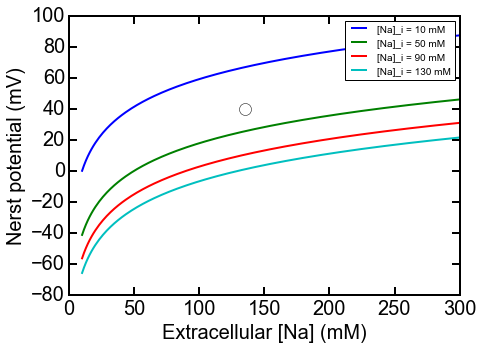

In [7]:
for Na in Na_electrode:
    plt.plot( Na_range, Nerst(Na_in = Na, Na_out = Na_range), label ='[Na]_i = %d mM'%Na);

plt.plot(135, myENa, 'wo', markersize = 12) # plot my reversal potential for Na
plt.legend(fontsize=10)
plt.ylabel('Nerst potential (mV)');
plt.xlabel('Extracellular [Na] (mM)');